## MACD <br>

MACD 지표와 시그널의 교차를 이용한 매매법 <br>

MACD 시그널은 MACD 지표의 이동 평균선이다 <br>

MACD > MACD 시그널  -> 매수 (강한 상승 모멘텀) <br>

MACD < MACD 시그널 -> 매도 

In [201]:
import yfinance as yf
import datetime
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

class datetime.datetime <br>
A combination of a date and a time. Attributes: year, month, day, hour, minute <br>second, microsecond, and tzinfo. <br>

<AxesSubplot:xlabel='Date'>

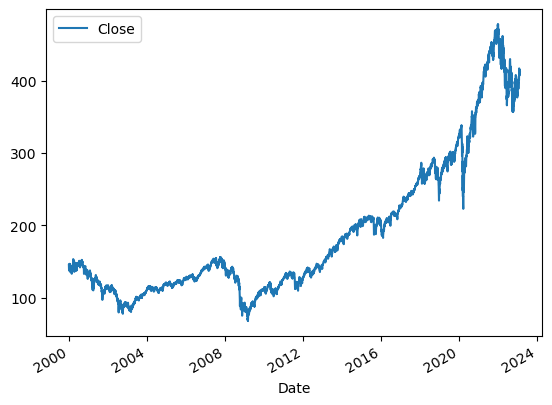

In [202]:
df = yf.download('SPY',start="2000-01-01", end="2023-02-15", 
                      progress=False,
)
df = df['Close'].to_frame()
df.plot()

In [203]:
df['Return'] = df['Close'].pct_change()
df.Return.iat[0] = 0                        # 도트 연산자로 칼럼에 접근 가능  #iat [] 대괄호 
df

,Close,Return
Date,,
2000-01-03 00:00:00-05:00,145.437500,0.000000
2000-01-04 00:00:00-05:00,139.750000,-0.039106
2000-01-05 00:00:00-05:00,140.000000,0.001789
2000-01-06 00:00:00-05:00,137.750000,-0.016071
2000-01-07 00:00:00-05:00,145.750000,0.058076
...,...,...
2023-02-08 00:00:00-05:00,410.649994,-0.010935
2023-02-09 00:00:00-05:00,407.089996,-0.008669
2023-02-10 00:00:00-05:00,408.040009,0.002334


In [204]:
cum_return = (df.Return + 1).cumprod() #pct_change로 했으면 1을 더해서 누적곱 해주어야 한다.
cum_return

Date
2000-01-03 00:00:00-05:00    1.000000
2000-01-04 00:00:00-05:00    0.960894
2000-01-05 00:00:00-05:00    0.962613
2000-01-06 00:00:00-05:00    0.947142
2000-01-07 00:00:00-05:00    1.002149
                               ...   
2023-02-08 00:00:00-05:00    2.823550
2023-02-09 00:00:00-05:00    2.799072
2023-02-10 00:00:00-05:00    2.805604
2023-02-13 00:00:00-05:00    2.838539
2023-02-14 00:00:00-05:00    2.837233
Name: Return, Length: 5817, dtype: float64

### MACD 매매 시그널 적용해보기 <br>

아무런 매매 시그널 없이 그냥 SPY에 넣어두었을 때의 수익률 : 281 % <br>
이제 MACD 매매 시그널을 적용한 누적 수익률을 백테스팅해서 비교해보자 <br>

<AxesSubplot:xlabel='Date'>

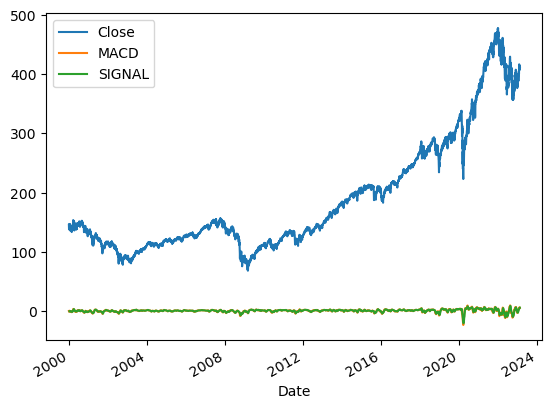

In [205]:
#MACD는 일반적으로 12일 지수이평선과 26일 지수이평선의 차이로 정의한다.
ema12 = df.Close.ewm(span = 12, adjust=False).mean()
ema26 = df.Close.ewm(span = 26, adjust=False).mean()

#ewm 은 지수가중평균을 구할 때 사용된다 
#지수평균이동선 : https://blog.naver.com/PostView.naver?blogId=geojerich&logNo=222160083790&parentCategoryNo=&categoryNo=14&viewDate=&isShowPopularPosts=true&from=search

df['MACD'] = ema12 - ema26
df['SIGNAL'] = df['MACD'].rolling(9).mean()
df.drop(columns ='Return').plot()

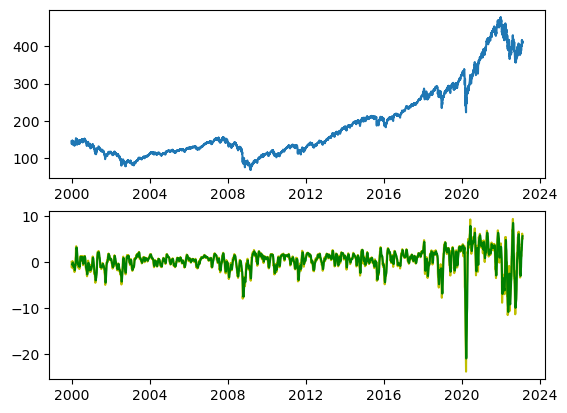

In [206]:
plt.figure()

#create subplot for price data
plt.subplot(2,1,1)
plt.plot(df.Close)

#create subplot for MACD
plt.subplot(212)
plt.plot(df['MACD'], color = 'y')
plt.plot(df['SIGNAL'], color = 'g')

#show plot
plt.show()


In [207]:
# setting buy sell signals
Status = df['MACD'] > df['SIGNAL']
df['Status'] = Status
df.iloc[-1,-1] = True
df

,Close,Return,MACD,SIGNAL,Status
Date,,,,,
2000-01-03 00:00:00-05:00,145.437500,0.000000,0.000000,NaN,False
2000-01-04 00:00:00-05:00,139.750000,-0.039106,-0.453704,NaN,False
2000-01-05 00:00:00-05:00,140.000000,0.001789,-0.784056,NaN,False
2000-01-06 00:00:00-05:00,137.750000,-0.016071,-1.213431,NaN,False
2000-01-07 00:00:00-05:00,145.750000,0.058076,-0.897831,NaN,False
...,...,...,...,...,...
2023-02-08 00:00:00-05:00,410.649994,-0.010935,5.959739,5.098838,True
2023-02-09 00:00:00-05:00,407.089996,-0.008669,5.464983,5.278343,True
2023-02-10 00:00:00-05:00,408.040009,0.002334,5.090860,5.424861,False


In [208]:

Buy = (df['Status'] == 1) & (df['Status'].shift(1) != 1)
Sell = (df['Status'] == 0) & (df['Status'].shift(1) == 1)
df



,Close,Return,MACD,SIGNAL,Status
Date,,,,,
2000-01-03 00:00:00-05:00,145.437500,0.000000,0.000000,NaN,False
2000-01-04 00:00:00-05:00,139.750000,-0.039106,-0.453704,NaN,False
2000-01-05 00:00:00-05:00,140.000000,0.001789,-0.784056,NaN,False
2000-01-06 00:00:00-05:00,137.750000,-0.016071,-1.213431,NaN,False
2000-01-07 00:00:00-05:00,145.750000,0.058076,-0.897831,NaN,False
...,...,...,...,...,...
2023-02-08 00:00:00-05:00,410.649994,-0.010935,5.959739,5.098838,True
2023-02-09 00:00:00-05:00,407.089996,-0.008669,5.464983,5.278343,True
2023-02-10 00:00:00-05:00,408.040009,0.002334,5.090860,5.424861,False


In [209]:
 #누적 수익률 계산   --> 전체를 넣었다 뺏다하는데, 불려졌으면 그대로 하는 방식(복리)
MACD_Rets = df.loc[Sell,'Close'].reset_index(drop=True)/df.loc[Buy,'Close'].reset_index(drop=True)
MACD_Rets.cumprod().iloc[-2]

1.232125392609499

### 백테스팅 결과 및 분석 <br>

SPY의 경우에는 MACD 시그널을 이용했을 때, 오히려 더 수익률이 저조한 현상이 나타난다 <br>
여기에 거래 수수료까지 적용하면 굉장히 수익률이 떨어진다 <br> 
어떤 부분에서 문제가 발생하는 알아보기 위해 더 구간을 작게 잡아서 실제 매수 매도를 표시해서 살펴보자 <br>


In [210]:
def get_MACD_rets(ticker = "SPY", start = "2000-01-01", end = '2023-02-17') :
    df = yf.download(ticker,start, end,progress=False)
    df = df['Close'].to_frame()
    
    ema12 = df.Close.ewm(span = 12, adjust=False).mean()
    ema26 = df.Close.ewm(span = 26, adjust=False).mean()
    
    df['MACD'] = ema12 - ema26
    df['SIGNAL'] = df['MACD'].rolling(9).mean()
    
    # setting buy sell signals
    Status = df['MACD'] > df['SIGNAL']
    df['Status'] = Status
    df.iloc[-1,-2] = 1
    df.iloc[-1,-1] = 0
    
    Buy = (df['Status'] == 1) & (df['Status'].shift(1) != 1)
    Sell = (df['Status'] == 0) & (df['Status'].shift(1) == 1)
    
    
    #누적 수익률 계산   --> 전체를 넣었다 뺏다하는데, 불려졌으면 그대로 하는 방식(복리)
    MACD_Rets = df.loc[Sell,'Close'].reset_index(drop=True)/df.loc[Buy,'Close'].reset_index(drop=True)
    print( "누적 수익률 : %.2f %%" %(MACD_Rets.cumprod().iloc[-2] * 100) )
    
    
    
    #making graph 
    plt.figure()
   #create subplot for price data
    graph1 = plt.subplot(2,1,1)
    graph1.set_title('Close')
    plt.plot(df.Close)
    
   #create subplot for MACD
    graph2 = plt.subplot(2,1,2)
    graph2.set_title('MACD')
    plt.plot(df['MACD'], color = 'y',label='MACD')
    plt.plot(df['SIGNAL'], color = 'g',label='SIGNAL')
    plt.legend(loc='upper right')
    plt.tight_layout(pad=1.0)
    plt.subplots_adjust(bottom=0.1, top=0.9)
   #show plot
    plt.show()
    
    
    
    
    
    #매수 매도 시점 그래프
    df['Buy'] = (df['Status'] == 1) & (df['Status'].shift(1) != 1)
    df['Sell'] = (df['Status'] == 0) & (df['Status'].shift(1) == 1)
    
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 1):
        if df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i].name)
            for num,j in enumerate(df.Sell[i:]):
                if j and ((i+num+1) < (len(df) - 1)):
                    Selling_dates.append(df.iloc[i+num+1].name)
                    break
                elif j:
                    Selling_dates.append(df.iloc[len(df) - 1].name)
                    break
                    
                    
    frame = pd.DataFrame({'Buying_dates': Buying_dates, 'Selling_dates': Selling_dates}) 
    
    Buyprices = df.loc[frame.Buying_dates].Close
    Sellprices = df.loc[frame.Selling_dates].Close
    
    
    plt.figure(figsize=(20,10))
    plt.plot(df.Close,color='k',alpha=0.7)
    
    
    plt.scatter(frame.Buying_dates, df.Close[frame.Buying_dates], marker='^',color='g',s=500)
    plt.scatter(frame.Selling_dates, df.Close[frame.Selling_dates], marker='v',color='r',s=500)
    plt.show()


    


누적 수익률 : 117.19 %


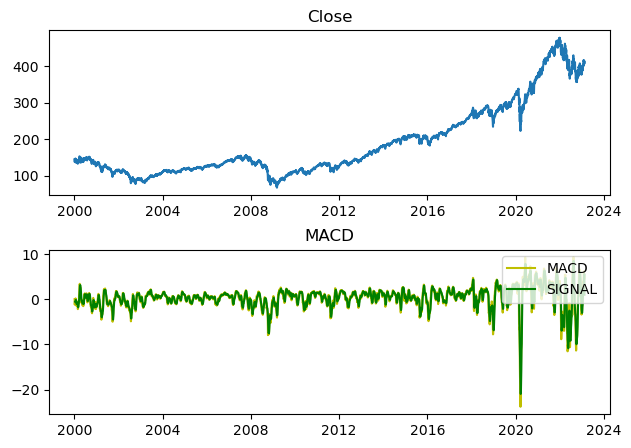

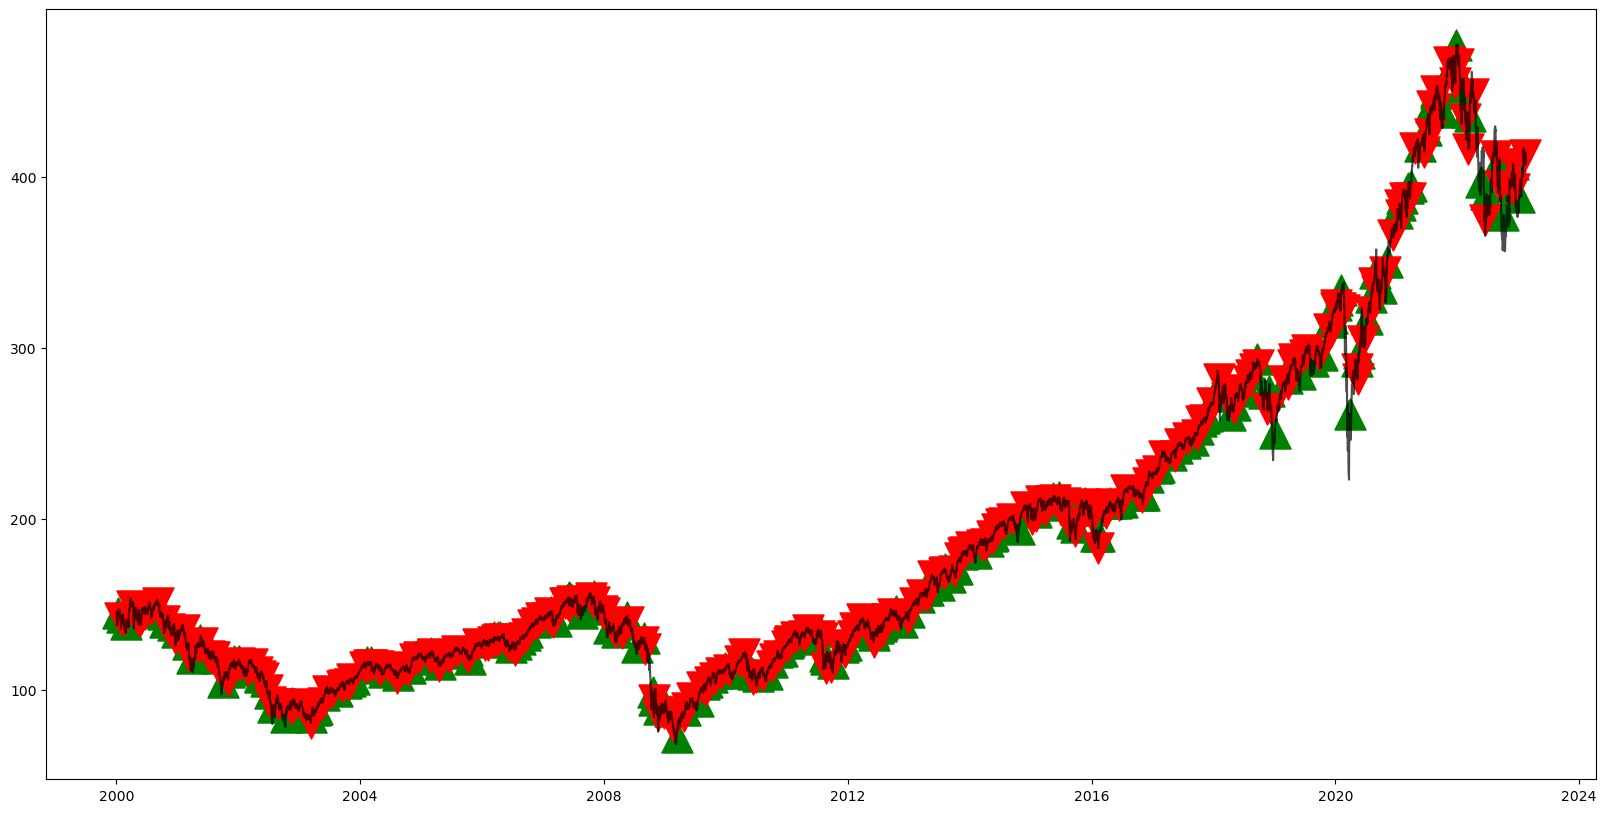

In [211]:
get_MACD_rets()

In [212]:
def get_simple_rets(ticker = "SPY", start = "2000-01-01", end = '2023-02-17'):
    df = yf.download(ticker,start, end,progress=False)
    df = df['Close'].to_frame()
    
    df['Return'] = df['Close'].pct_change()
    df.Close.plot()
    return (df['Return'] + 1).cumprod().iloc[-1]

2.807253966681883

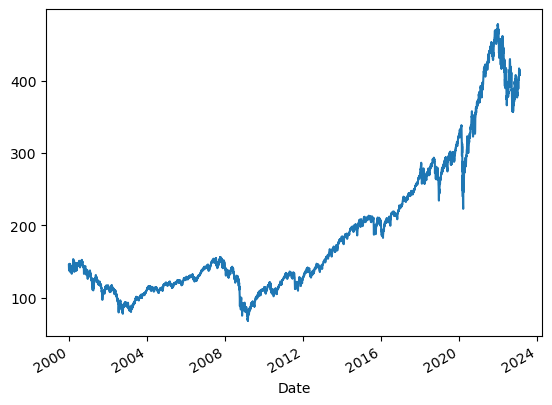

In [213]:
get_simple_rets()

### 시기별 비교 백테스팅

0.8881975889613701

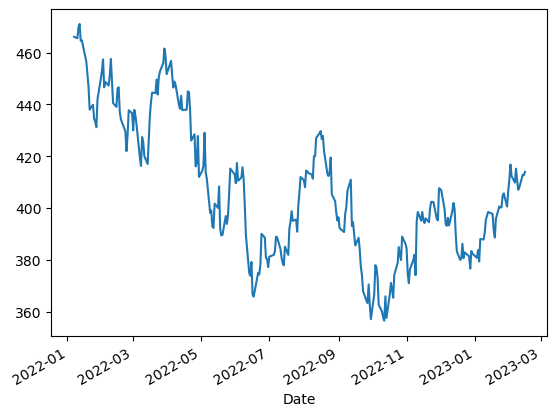

In [214]:
# 가장 최근 만 백테스팅 최고점 이후 하락장 
get_simple_rets('SPY','2022-01-07','2023-02-16')

누적 수익률 : 90.29 %


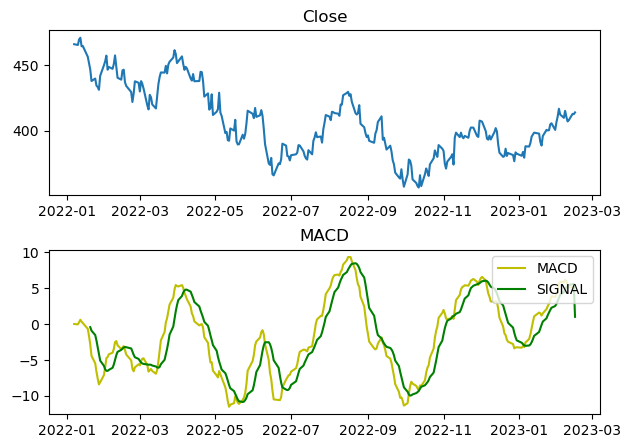

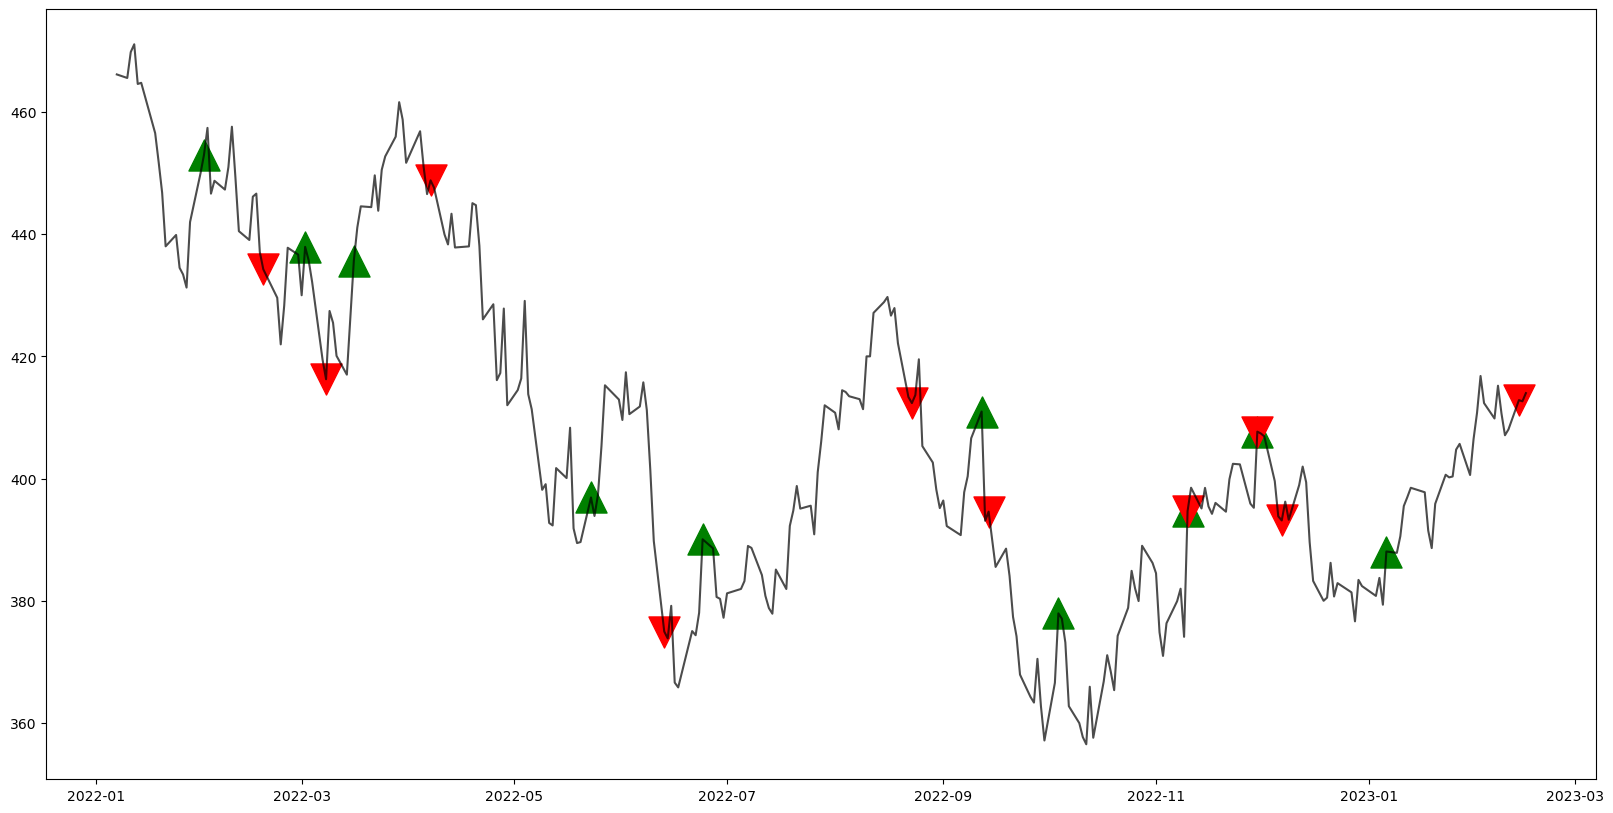

In [215]:
get_MACD_rets('SPY','2022-01-07','2023-02-16')  # 하락장에서는 손실을 더 잘 줄여주는 모습이다 

2.081118869366423

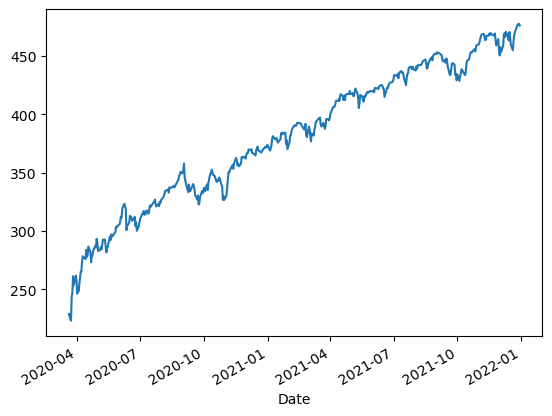

In [218]:
# 코로나 이후 급격한 상승장 
get_simple_rets('SPY','2020-03-20','2021-12-31')


누적 수익률 : 134.13 %


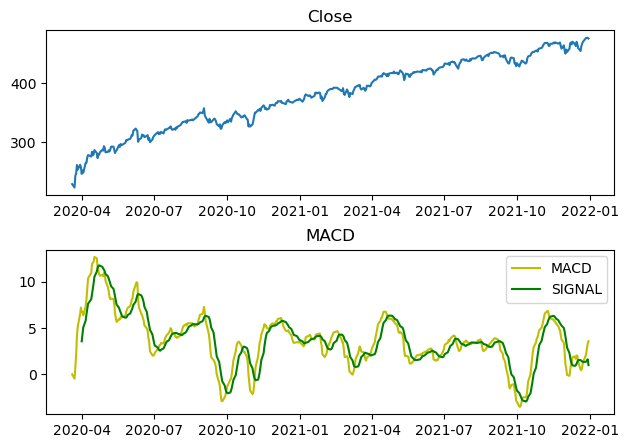

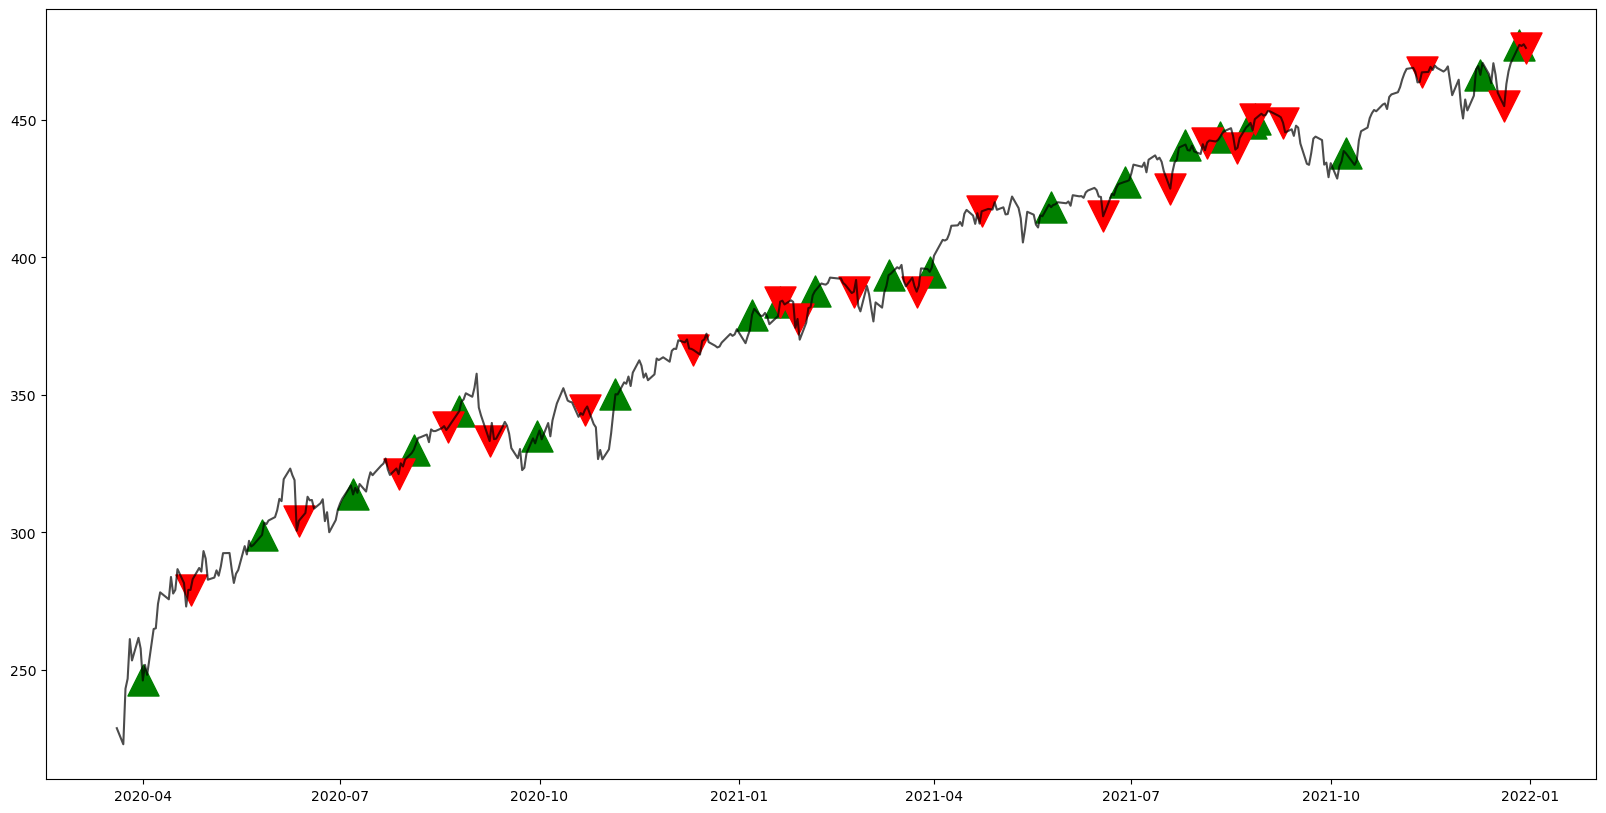

In [217]:
# 급 상승장에서 재대로 수익률을 내지 못한다.
get_MACD_rets('SPY','2020-03-20','2021-12-31')

결과 분석 : <br>

하락장에서는 빠른 손절을 하여 손실폭을 줄인다 <br>
<br>
그러나 긴 기간 계속 상승장인 강한 상승장세에도 계속 매도와 매수를 반복하면서 <br>
중간에 수익으로 가지고 가지 못하는 부분들이 많이 생긴다 <br>

### Appendix

#### name method <br>

시계열 데이터에서 날짜정보에 접근가능하게 해준다.

In [221]:
test = yf.download('QQQ',start="2023-01-01", end="2023-02-15", 
                      progress=False,
)
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03 00:00:00-05:00,268.649994,270.149994,262.130005,264.480011,264.480011,42335300
2023-01-04 00:00:00-05:00,266.640015,267.450012,262.529999,265.739990,265.739990,47754900
2023-01-05 00:00:00-05:00,264.040009,264.209991,261.260010,261.579987,261.579987,45396700
2023-01-06 00:00:00-05:00,263.350006,269.940002,260.339996,268.799988,268.799988,54573600
2023-01-09 00:00:00-05:00,270.829987,275.290009,269.920013,270.540009,270.540009,45568700
2023-01-10 00:00:00-05:00,269.489990,272.940002,268.970001,272.829987,272.829987,35247800
2023-01-11 00:00:00-05:00,273.920013,277.660004,273.119995,277.549988,277.549988,44077000
2023-01-12 00:00:00-05:00,278.119995,280.100006,273.739990,279.049988,279.049988,60600000
2023-01-13 00:00:00-05:00,276.500000,281.220001,276.160004,280.970001,280.970001,44707500


In [224]:
over300 = []
size = len(test)

for i in range(size):
    if test.Open.iloc[i] > 300:
        over300.append(test.iloc[i].name)
        
over300
    


[Timestamp('2023-02-02 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-03 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-06 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-07 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-08 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-09 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-13 00:00:00-0500', tz='America/New_York'),
 Timestamp('2023-02-14 00:00:00-0500', tz='America/New_York')]